In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [678]:
us_cases = pd.read_csv("daily_covid_cases.csv")
del us_cases["State"]
us_cases["Date"] = pd.to_datetime(dataset["Date"], infer_datetime_format = True)
us_cases = us_cases.set_index(["Date"])
us_cases.shape

(458, 1)

In [687]:
from pmdarima import auto_arima
  
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
  
# Fit auto_arima function to AirPassengers dataset
arima_model = auto_arima(us_cases, start_p = 0, start_q = 0,
                          max_p = 5, max_q = 5, m = 1,max_d = 5,
                          start_P = 0, seasonal = False,
                          d = 1, D = 0,max_Q = 5,max_D = 5, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise
  
# To print the summary
arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=10044.547, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10039.370, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10034.668, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=10042.590, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=10005.871, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=9997.946, Time=0.10 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=10027.204, Time=0.04 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=9993.065, Time=0.13 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=10021.979, Time=0.05 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=9958.521, Time=0.15 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=9974.097, Time=0.09 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=9947.469, Time=0.17 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=9946.460, Time=0.63 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=9944.746, Time=0.11 sec
 ARIMA(4,1,0)(0,0,0)[0]   

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  458
Model:               SARIMAX(5, 1, 0)   Log Likelihood               -4966.373
Date:                Wed, 28 Apr 2021   AIC                           9944.746
Time:                        02:16:19   BIC                           9969.494
Sample:                             0   HQIC                          9954.494
                                - 458                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2894      0.022    -13.135      0.000      -0.333      -0.246
ar.L2         -0.2997      0.025    -11.948      0.000      -0.349      -0.251
ar.L3         -0.2430      0.027     -9.039      0.000      -0.296      -0.190
ar.L4         -0.3728      0.023    -15.921      0.000      -0.419      -0.327
ar.L5         -0.2495      0.022    -11.561      0.000      -0.292      -0.207
sigma2      1.625e+08   7.77e-11   2.09e+18      0.000    1.63e+08    1.63e+08
===================================================================================
Ljung-Box (Q):                      226.77   Jarque-Bera (JB):              5112.85
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              20.95   Skew:                             1.13
Prob(H) (two-sided):                  0.00   Kurtosis:                        19.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.14e+33. Standard errors may be unstable.
"""

In [694]:
train = us_cases[:366]
test = us_cases[-92:] # set one year(12 months) for testing
  

from statsmodels.tsa.statespace.sarimax import SARIMAX
  
model = SARIMAX(train['New Cases'], 
                order = (5,1,3))
  
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              New Cases   No. Observations:                  366
Model:               SARIMAX(5, 1, 3)   Log Likelihood               -3950.681
Date:                Wed, 28 Apr 2021   AIC                           7919.363
Time:                        02:20:04   BIC                           7954.462
Sample:                    01-22-2020   HQIC                          7933.311
                         - 01-21-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1838      0.058     -3.177      0.001      -0.297      -0.070
ar.L2          0.0266      0.041      0.653      0.514      -0.053       0.107
ar.L3         -0.7302      0.030    -24.156      0.000      -0.789      -0.671
ar.L4         -0.4264      0.033    -12.944      0.000      -0.491      -0.362
ar.L5         -0.2799      0.039     -7.205      0.000      -0.356      -0.204
ma.L1         -0.2104      0.048     -4.383      0.000      -0.304      -0.116
ma.L2         -0.2897      0.045     -6.392      0.000      -0.378      -0.201
ma.L3          0.8707      0.037     23.361      0.000       0.798       0.944
sigma2       1.61e+08   3.95e-10   4.08e+17      0.000    1.61e+08    1.61e+08
===================================================================================
Ljung-Box (Q):                       90.68   Jarque-Bera (JB):              4669.34
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              27.96   Skew:                             1.01
Prob(H) (two-sided):                  0.00   Kurtosis:                        20.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.67e+33. Standard errors may be unstable.
"""

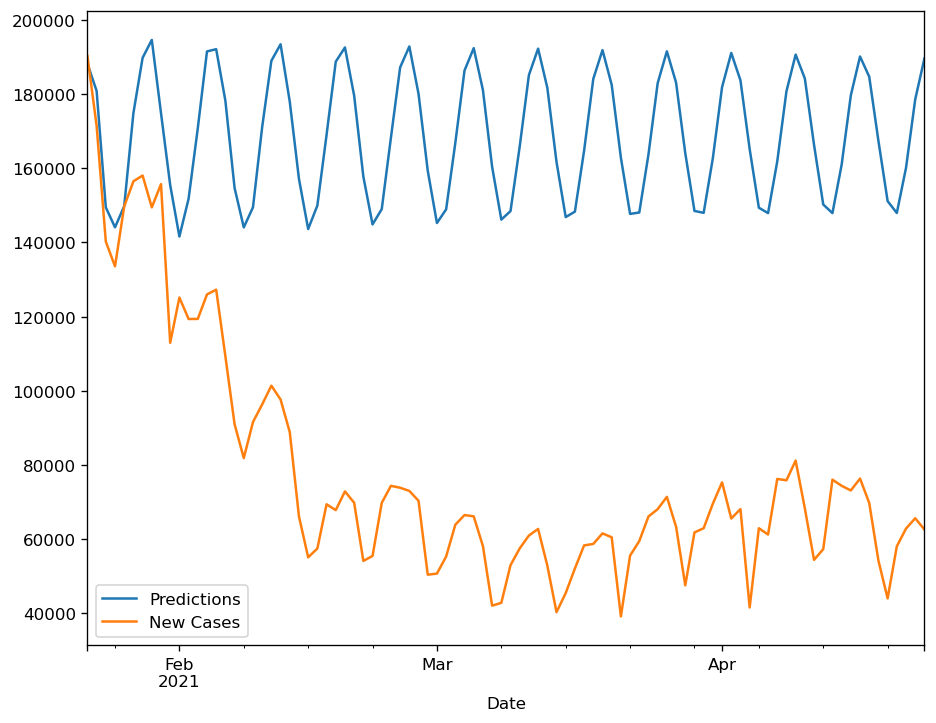

In [695]:
start = len(train)
end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set
predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")
  
# plot predictions and actual values
predictions.plot(legend = True)
test['New Cases'].plot(legend = True)

In [696]:
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
  
# Calculate root mean squared error
print(rmse(test["New Cases"], predictions))
  
# Calculate mean squared error
mean_squared_error(test["New Cases"], predictions)

96906.09739256655


9390791711.857592

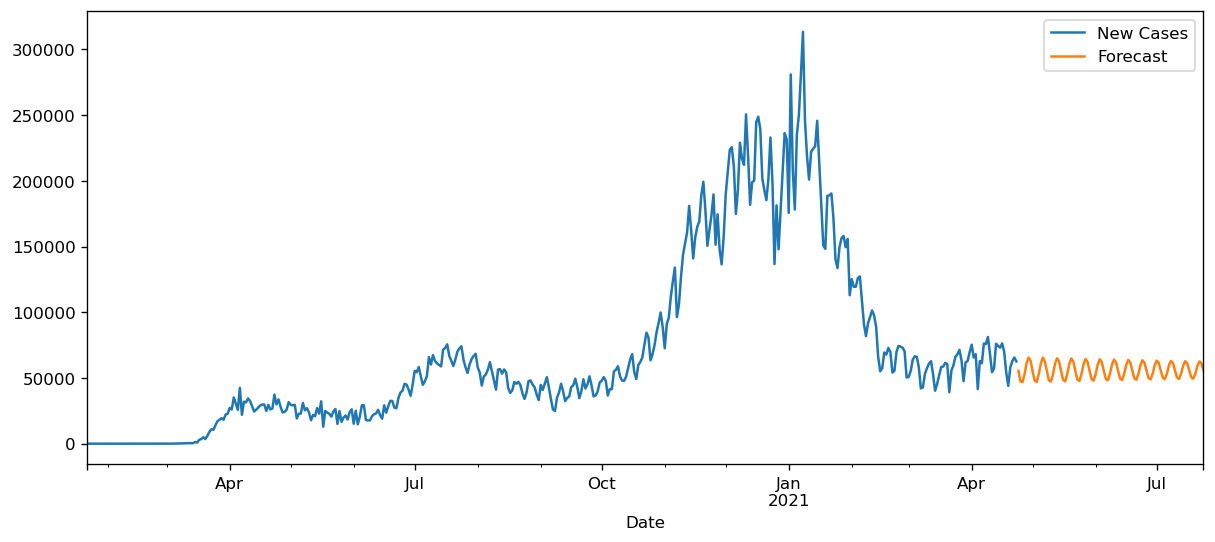

In [693]:
# Train the model on the full dataset
model = model = SARIMAX(us_cases['New Cases'], 
                        order = (5,1,3))
result = model.fit()
  
# Forecast for the next 3 months
forecast = result.predict(start = len(us_cases), 
                          end = (len(us_cases)-1) + 92, 
                          typ = 'levels').rename('Forecast')
  
# Plot the forecast values
us_cases['New Cases'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)

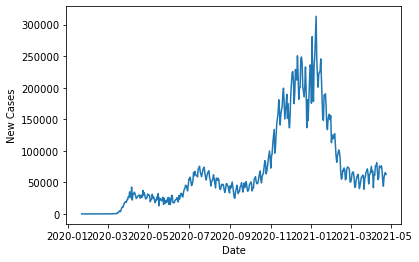

In [23]:
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.plot(indexedDataset)

In [26]:
# rolling statistics
rolmean = indexedDataset.rolling(window = 7).mean()
rolstd = indexedDataset.rolling(window = 7).std()

print(rolmean,rolstd)

               New Cases
Date                    
2020-01-22           NaN
2020-01-23           NaN
2020-01-24           NaN
2020-01-25           NaN
2020-01-26           NaN
...                  ...
2021-04-19  66813.428571
2021-04-20  64243.571429
2021-04-21  62595.714286
2021-04-22  61524.714286
2021-04-23  59562.714286

[458 rows x 1 columns]                New Cases
Date                    
2020-01-22           NaN
2020-01-23           NaN
2020-01-24           NaN
2020-01-25           NaN
2020-01-26           NaN
...                  ...
2021-04-19  12654.227408
2021-04-20  12294.184152
2021-04-21  11456.423449
2021-04-22  10631.143788
2021-04-23   8500.973723

[458 rows x 1 columns]


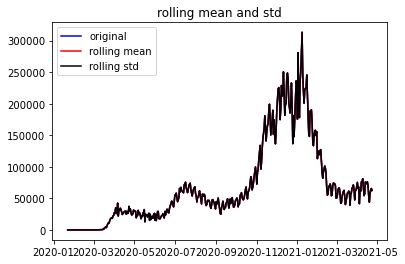

In [29]:
original = plt.plot(indexedDataset, color = 'blue', label = "original")
mean = plt.plot(indexedDataset, color = 'red', label = "rolling mean")
std = plt.plot(indexedDataset, color = 'black', label = "rolling std")
plt.legend(loc = "best")
plt.title("rolling mean and std")
plt.show(block = False)

In [33]:
# perform Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

print("results of d-f test:")
dftest  = adfuller(indexedDataset["New Cases"], autolag = 'AIC')

dfoutput = pd.Series(dftest[0:4], index = ["Test Statistics", 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput["Critical Value (%s)"%key] = value
print(dfoutput)

results of d-f test:
Test Statistics                 -1.644684
p-value                          0.459814
#Lags Used                      15.000000
Number of Observations Used    442.000000
Critical Value (1%)             -3.445232
Critical Value (5%)             -2.868101
Critical Value (10%)            -2.570265
dtype: float64


<ipython-input-307-ee83a552c13c>:2: RuntimeWarning: divide by zero encountered in log
  indexedDataset_logScale = np.log(indexedDataset)


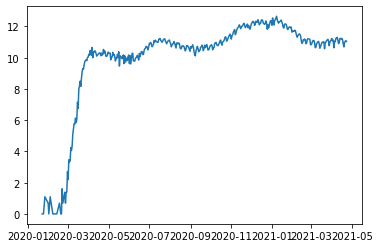

In [307]:
# estimating trend
indexedDataset_logScale = np.log(indexedDataset)
indexedDataset_logScale.replace([np.inf, -np.inf], np.nan, inplace=True)
indexedDataset_logScale.dropna(inplace = True)
plt.plot(indexedDataset_logScale)


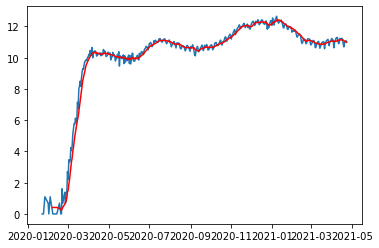

In [112]:
movingAverage = indexedDataset_logScale.rolling(window = 7).mean()
movingSTD = indexedDataset_logScale.rolling(window = 7).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color = "red")

In [113]:
datasetLogScaleMinusMovingAverage = indexedDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage.dropna(inplace = True)
datasetLogScaleMinusMovingAverage.head(10)


,New Cases
Date,
2020-02-07,-0.412910
2020-02-11,-0.412910
2020-02-13,-0.412910
2020-02-17,0.338161
2020-02-19,-0.255966
2020-02-20,-0.255966
2020-02-21,1.280497
2020-02-22,0.265185
2020-02-25,0.760291


In [114]:
def test_stationarity(timeseries):
    movingAverage = timeseries.rolling(window = 7).mean()
    movingSTD = timeseries.rolling(window = 7).std()
    
    original = plt.plot(timeseries, color = 'blue', label = "original")
    mean = plt.plot(movingAverage, color = 'red', label = "rolling mean")
    std = plt.plot(movingSTD, color = 'black', label = "rolling std")
    plt.legend(loc = "best")
    plt.title("rolling mean and std")
    plt.show(block = False)
    
    print("results of d-f test:")
    dftest  = adfuller(timeseries["New Cases"], autolag = 'AIC')

    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistics", 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    print(dfoutput)
    

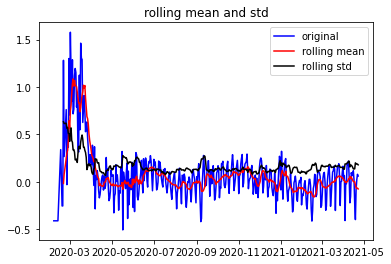

results of d-f test:
Test Statistics                 -4.275680
p-value                          0.000489
#Lags Used                      15.000000
Number of Observations Used    416.000000
Critical Value (1%)             -3.446168
Critical Value (5%)             -2.868513
Critical Value (10%)            -2.570484
dtype: float64


In [115]:
test_stationary(datasetLogScaleMinusMovingAverage)

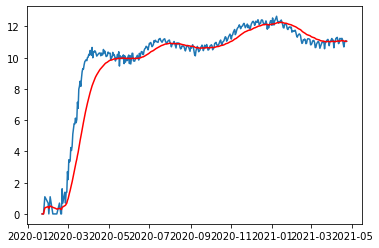

In [290]:
exponentialDWA = indexedDataset_logScale.ewm(halflife = 12, min_periods = 0, adjust = True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDWA, color = "red")

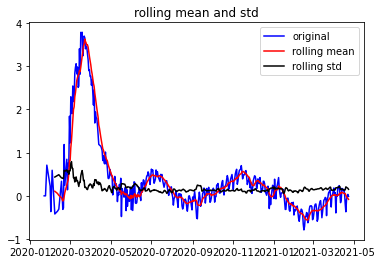

results of d-f test:
Test Statistics                 -3.029689
p-value                          0.032213
#Lags Used                      15.000000
Number of Observations Used    422.000000
Critical Value (1%)             -3.445941
Critical Value (5%)             -2.868413
Critical Value (10%)            -2.570431
dtype: float64


In [117]:
datasetLogScaleMinusExponentialDWA = indexedDataset_logScale - exponentialDWA
#indexedDataset_logScale.head()
#exponentialDWA.head(40)
datasetLogScaleMinusExponentialDWA.replace([np.inf, -np.inf], np.nan, inplace=True)
datasetLogScaleMinusExponentialDWA.dropna(inplace = True)
test_stationarity(datasetLogScaleMinusExponentialDWA)

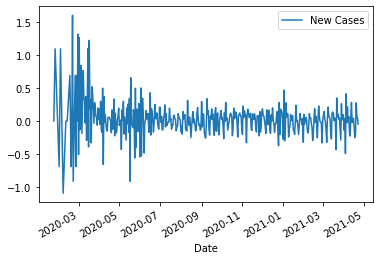

In [118]:
datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift(1)
datasetLogDiffShifting.plot()

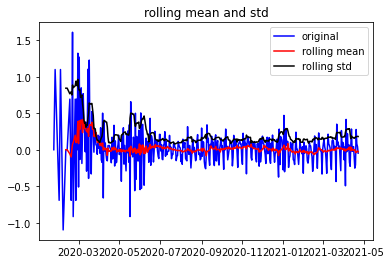

results of d-f test:
Test Statistics                 -3.038225
p-value                          0.031476
#Lags Used                      16.000000
Number of Observations Used    420.000000
Critical Value (1%)             -3.446016
Critical Value (5%)             -2.868446
Critical Value (10%)            -2.570449
dtype: float64


In [119]:
datasetLogDiffShifting.replace([np.inf, -np.inf], np.nan, inplace=True)
datasetLogDiffShifting.dropna(inplace = True)
test_stationarity(datasetLogDiffShifting)

[            nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan -1.33657857e+00
 -8.87538550e-01 -1.03911266e+00  3.36618604e-02 -6.61546091e-01
  2.80496529e-01 -2.72729904e-02 -2.91274585e-01  3.15553010e-01
 -1.08573739e-01 -1.61547279e-01  2.52014723e-01  3.53906200e-01
  4.22041560e-01  1.10959925e-01  2.45822399e-01 -3.51411918e-01
 -4.40409512e-01  3.25924304e-01 -2.49739613e-01  6.39690863e-01
  6.34968362e-01  7.16346153e-01  2.18347378e-01  4.92165071e-01
  7.09997128e-01  7.22472475e-01  5.19460557e-01  6.66173273e-01
  6.55162403e-01  7.33618751e-01  6.02621486e-01  4.26926206e-01
  4.50380017e-01  4.00434950e-01  3.86983747e-01  3.41909316e-01
  5.21570625e-01  3.58348507e-01  1.59845266e-01  5.64980362e-01
 -1.76272935e-01  1.82647741e-01  1.69239192e-01  2.41021342e-01
  2.18523982e-01  6.12708

AttributeError: 'numpy.ndarray' object has no attribute 'dropna'

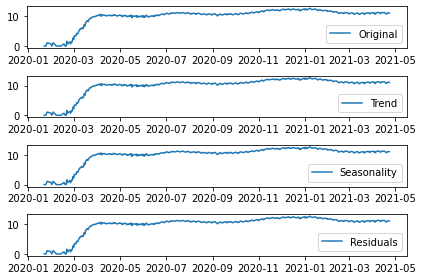

In [143]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedDataset_logScale["New Cases"].values, period = 30)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logScale, label = "Original")
plt.legend(loc = "best")
plt.subplot(412)
plt.plot(indexedDataset_logScale, label = "Trend")
plt.legend(loc = "best")
plt.subplot(413)
plt.plot(indexedDataset_logScale, label = "Seasonality")
plt.legend(loc = "best")
plt.subplot(414)
plt.plot(indexedDataset_logScale, label = "Residuals")
plt.legend(loc = "best")
plt.tight_layout()


decomposedLogData = residual
print((decomposedLogData))
decomposedLogData.dropna(inplace = True)
test_stationarity(decomposedLogData)


In [134]:
#decomposedLogData
"""decomposedLogData.dropna(inplace = True)
test_stationarity(decomposedLogData)"""

'decomposedLogData.dropna(inplace = True)\ntest_stationarity(decomposedLogData)'

In [170]:
"""from statsmodels.tsa.stattools import acf, pacf

lag_acf = np.vectorize(acf(datasetLogDiffShifting, nlags = 20))
lag_pacf = pacf(datasetLogDiffShifting, nlags = 20, method = 'ols')

# plot acf
plt.subplot(121)
plt.subplot(lag_acf)
plt.axhline(y = 0, linestyle = '--', color = "gray")
plt.axhline(y = -1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle = '--', color = "gray")
plt.axhline(y = 1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle = '--', color = "gray")
plt.title("autocorrelation function")

# plot pacf
plt.subplot(122)
plt.subplot(lag_pacf)
plt.axhline(y = 0, linestyle = '--', color = "gray")
plt.axhline(y = -1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle = '--', color = "gray")
plt.axhline(y = 1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle = '--', color = "gray")
plt.title("partial autocorrelation function")
plt.tight_layout()"""
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import acf, pacf
#plt.plot(acf(datasetLogDiffShifting)

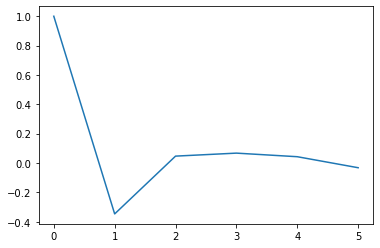

In [176]:
#fig_two = plot_pacf(datasetLogDiffShifting)
plt.plot(pacf(datasetLogDiffShifting, nlags = 5, method = 'ols'))

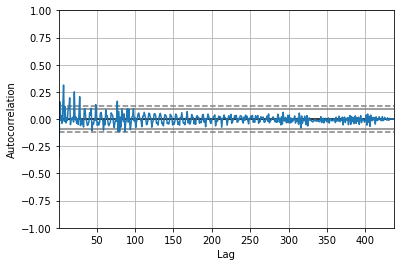

In [178]:
autocorrelation_plot(datasetLogDiffShifting)


/Users/18daniel/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/18daniel/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


Text(0.5, 1.0, 'RSS: 19.4187')

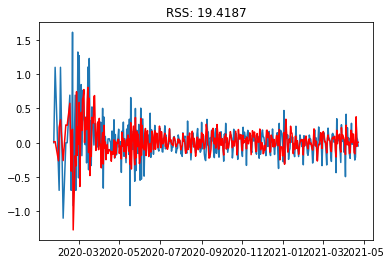

In [223]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(indexedDataset_logScale, order = (16,1,1))
results_AR = model.fit(disp = -1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color = 'red')
plt.title("RSS: %.4f"% sum((results_AR.fittedvalues - datasetLogDiffShifting["New Cases"])**2))



In [224]:
predictions_AR_diff = pd.Series(results_AR.fittedvalues, copy = True)
print(predictions_AR_diff.head())

Date
2020-01-24    0.013188
2020-01-26    0.016774
2020-01-31   -0.262955
2020-02-01    0.225289
2020-02-03    0.334440
dtype: float64


In [464]:
predictions_AR_diff_cumsum = predictions_AR_diff.cumsum()
predictions_AR_diff_cumsum.head()

Date
2020-01-24    0.013188
2020-01-26    0.029962
2020-01-31   -0.232993
2020-02-01   -0.007704
2020-02-03    0.326736
dtype: float64

In [473]:
predictions_AR_log = pd.Series(indexedDataset_logScale["New Cases"].iloc[0], index = indexedDataset_logScale.index) #.iloc[0]
predictions_AR_log = predictions_AR_log.add(predictions_AR_diff_cumsum, fill_value = 0)
predictions_AR_log.head()

Date
2020-01-22    0.000000
2020-01-24    0.013188
2020-01-26    0.029962
2020-01-31   -0.232993
2020-02-01   -0.007704
dtype: float64

Date
2020-01-22    1.000000e+00
2020-01-24    1.013275e+00
2020-01-26    3.091246e+00
2020-01-31    1.584318e+00
2020-02-01    9.923256e-01
                  ...     
2021-04-19    2.378162e+08
2021-04-20    4.579702e+08
2021-04-21    4.698246e+08
2021-04-22    4.923783e+08
2021-04-23    4.732373e+08
Length: 438, dtype: float64

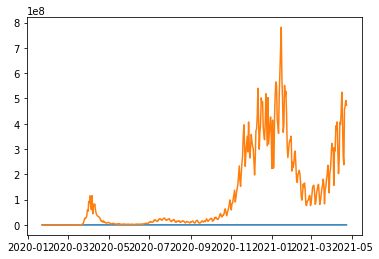

In [470]:
predictions_AR = np.exp(predictions_AR_log)
plt.plot(indexedDataset)
plt.plot(predictions_AR)
(predictions_AR)

/Users/18daniel/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:580: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/Users/18daniel/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:580: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/Users/18daniel/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:580: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



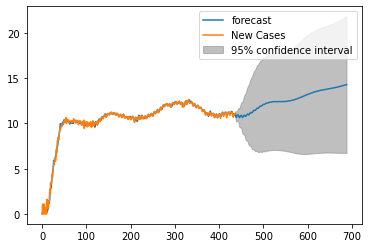

In [500]:
forecast = results_AR.plot_predict(1,689) #(1,689)
x = results_AR.forecast(steps = 251)
#plt.plot(indexedDataset_logScale, color = "red")
#np.exp(indexedDataset_logScale)
estimate = np.exp(np.log10(np.exp(x[0]*2.25)))
upper = np.exp(np.log10(np.exp([i[1]*2.25 for i in x[2]])))
lower = np.exp(np.log10(np.exp([i[0]*2.25 for i in x[2]])))
#np.exp(x[0]),np.exp(np.log10(np.exp(x[0]*2.25)))

In [501]:
from statsmodels.tsa.api import ExponentialSmoothing
exp = ExponentialSmoothing(estimate)
exp_u = ExponentialSmoothing(upper)
exp_l = ExponentialSmoothing(lower)
exp_model = exp.fit(smoothing_level=0.5)
exp_umodel = exp_u.fit(smoothing_level=0.5)
exp_lmodel = exp_l.fit(smoothing_level=0.5)
result = exp_model.fittedvalues
result_u = exp_umodel.fittedvalues
result_l = exp_lmodel.fittedvalues


In [503]:
rng = pd.date_range('4/24/21', periods=251, freq='D')

forecast_df = pd.DataFrame({'Date': rng, 'Projected Daily Cases':result, 'Lower':result_l, 'Upper':result_u})
forecast_df


,Date,Projected Daily Cases,Lower,Upper
0,2021-04-24,4.122140e+04,27133.790798,6.745564e+04
1,2021-04-25,4.362380e+04,29269.141720,6.745564e+04
2,2021-04-26,3.954147e+04,26409.529290,6.042325e+04
3,2021-04-27,3.661098e+04,23798.983336,5.698036e+04
4,2021-04-28,3.813980e+04,23771.643292,6.162654e+04
...,...,...,...,...
246,2021-12-26,1.063610e+06,730.221066,1.549793e+09
247,2021-12-27,1.078613e+06,730.147037,1.593990e+09
248,2021-12-28,1.094137e+06,730.255800,1.639964e+09
249,2021-12-29,1.110058e+06,730.461611,1.687565e+09


In [504]:
import plotly.graph_objs as go

fig = go.Figure([
    go.Scatter(
        name='Daily Cases',
        x=dataset['Date'],
        y=indexedDataset['New Cases'],
        mode='lines',
        line=dict(color='rgb(31, 119, 180)'),
    ),
    go.Scatter(
        name='Projected Daily Cases',
        x=forecast_df['Date'],
        y=forecast_df['Projected Daily Cases'],
        mode='lines',
        line=dict(color='rgb(31, 119, 180)'),
    ),
    go.Scatter(
        name='Upper Bound',
        x=forecast_df['Date'],
        y=forecast_df['Upper'],
        mode='lines',
        marker=dict(color="#444"),
        line=dict(width=0),
        showlegend=False
    ),
    go.Scatter(
        name='Lower Bound',
        x=forecast_df['Date'],
        y=forecast_df['Lower'],
        marker=dict(color="#444"),
        line=dict(width=0),
        mode='lines',
        fillcolor='rgba(68, 68, 68, 0.3)',
        fill='tonexty',
        showlegend=False
    )
])
fig.update_layout(
    yaxis_title='Wind speed (m/s)',
    title='Continuous, variable value error bars',
    hovermode="x"
)
fig.update_yaxes(range=[0, 350000])

fig.show()